# Food Delivery cost Analysis

In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\PMLS\OneDrive\Desktop\MAKE IT\PYTHON FOR DATA ANALYSIS\1st python project\food delivery costs.csv")
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


# Data Cleaning

In [6]:
df["Order Date and Time"]=pd.to_datetime(df["Order Date and Time"])
df["Delivery Date and Time"]=pd.to_datetime(df["Delivery Date and Time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [7]:
 #Extract the month from the 'Order Date and Time' column
df['Order Month'] = df['Order Date and Time'].dt.strftime('%B')

In [8]:
# Extract the day name from the 'Order Date and Time' column
df['Order Day'] = df['Order Date and Time'].dt.strftime('%A')

In [9]:
# Extract the time from the 'Order Date and Time' column
df['Order Time'] = df['Order Date and Time'].dt.strftime('%I:%M %p')

# Function to categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply function to categorize based on time
df['Order Period'] = df['Order Date and Time'].dt.hour.apply(categorize_time)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  Order Month             1000 non-null   object   

In [11]:
def extract(value):
    a=str(value).split(" ")
    return a[0]

df["Discounts and Offers"]=df["Discounts and Offers"].apply(extract)
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Order Day,Order Time,Order Period
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5%,150,47,0,February,Thursday,01:11 AM,Night
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,February,Friday,10:11 PM,Night
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15%,195,45,0,January,Wednesday,05:54 AM,Morning
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,nan,146,27,0,January,Tuesday,10:52 PM,Night
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50,130,50,0,January,Monday,01:19 AM,Night


In [12]:
def removep(value):
    if"%" in value:
        a=value.replace("%","")
        return float(a)
    else:
        return float(value)

df["Discounts and Offers"]=df["Discounts and Offers"].apply(removep)
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Order Day,Order Time,Order Period
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5.0,150,47,0,February,Thursday,01:11 AM,Night
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10.0,198,23,0,February,Friday,10:11 PM,Night
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15.0,195,45,0,January,Wednesday,05:54 AM,Morning
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,January,Tuesday,10:52 PM,Night
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.0,130,50,0,January,Monday,01:19 AM,Night


In [13]:
df.loc[(df["Discounts and Offers"] <= 15),"Discounts and Offers" ] = (df["Discounts and Offers"]/100) * df["Order Value"]

In [14]:
df["Dicounts and Offers"]= df["Discounts and Offers"].fillna(0)
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Order Day,Order Time,Order Period,Dicounts and Offers
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0,February,Thursday,01:11 AM,Night,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0,February,Friday,10:11 PM,Night,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0,January,Wednesday,05:54 AM,Morning,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,January,Tuesday,10:52 PM,Night,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0,January,Monday,01:19 AM,Night,50.00


# Cost and Profitability Analysis

In [15]:
df["Costs"] = df["Delivery Fee"] + df['Discounts and Offers'] + df["Payment Processing Fee"]


In [16]:
df["Revenue"]=df["Commission Fee"]


In [17]:
df["Profit"] = df["Revenue"] - df['Costs']
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Order Day,Order Time,Order Period,Dicounts and Offers,Costs,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0,February,Thursday,01:11 AM,Night,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0,February,Friday,10:11 PM,Night,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0,January,Wednesday,05:54 AM,Morning,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,January,Tuesday,10:52 PM,Night,0.00,NaN,146,NaN
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0,January,Monday,01:19 AM,Night,50.00,130.00,130,0.00


In [18]:
df["Profit"].sum()

-17975.85

In [19]:
df["Costs"].sum()

121773.85

In [20]:
df["Revenue"].sum()

126990

In [21]:
cost_dist = df[["Delivery Fee", "Payment Processing Fee", "Discounts and Offers"]].sum()
cost_dist

Delivery Fee              28620.00
Payment Processing Fee    29832.00
Discounts and Offers      74289.85
dtype: float64

# Visualization

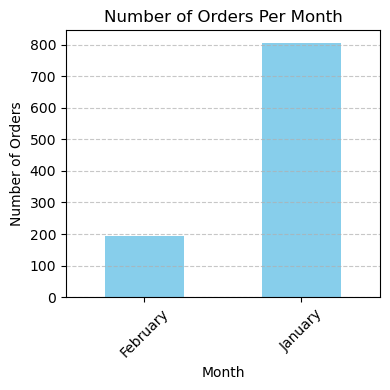

In [22]:

import matplotlib.pyplot as plt

# Aggregate the number of orders by month
monthly_orders = df['Order Month'].value_counts().sort_index()

# Plot the number of orders per month
plt.figure(figsize=(4,4))
monthly_orders.plot(kind='bar', color='skyblue')
plt.title('Number of Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


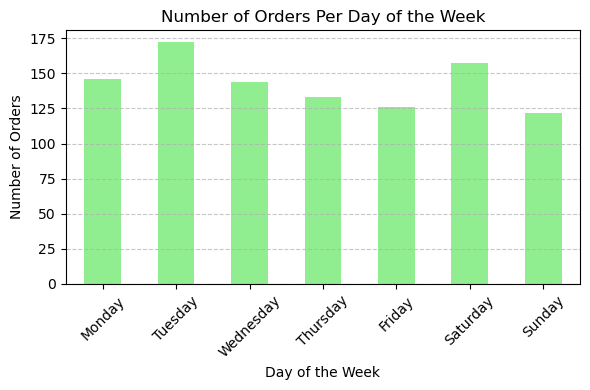

In [23]:
# Aggregate the number of orders by day of the week
daily_orders = df['Order Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the number of orders per day of the week
plt.figure(figsize=(6,4))
daily_orders.plot(kind='bar', color='lightgreen')
plt.title('Number of Orders Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


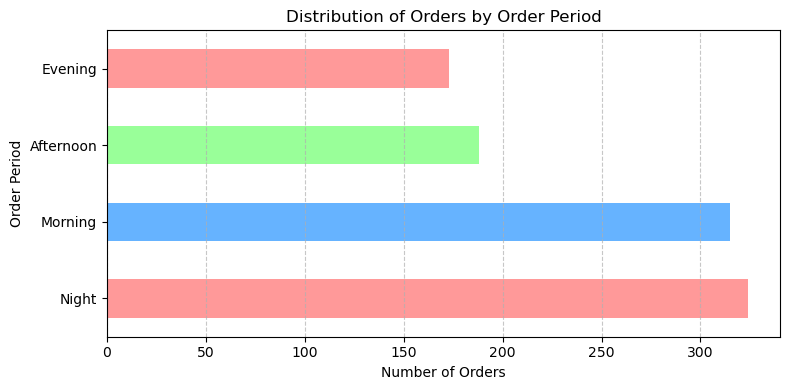

In [24]:
# Count the number of orders for each order period (e.g., Morning, Evening, Night)
order_period_counts = df['Order Period'].value_counts()

plt.figure(figsize=(8, 4))
order_period_counts.plot(kind='barh', color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Orders by Order Period')
plt.xlabel('Number of Orders')
plt.ylabel('Order Period')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

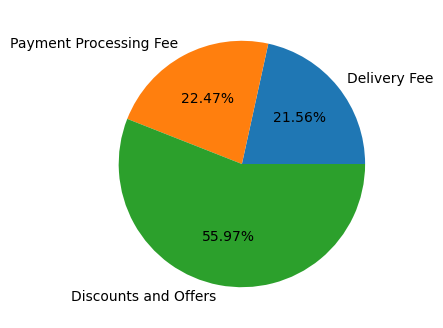

In [25]:
# Distribution of cost
plt.figure(figsize = (4,4))
plt.pie(cost_dist, labels = cost_dist.index, autopct = "%1.2f%%")
plt.show()

In [26]:
Data = df[["Revenue", "Costs","Profit"]].sum()
Data

Revenue    126990.00
Costs      121773.85
Profit     -17975.85
dtype: float64

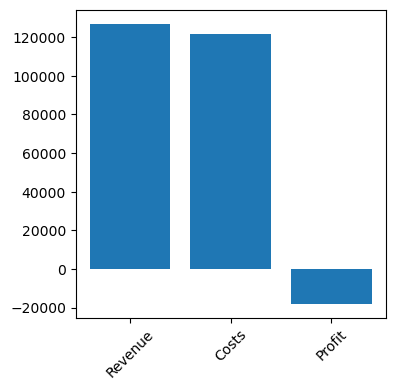

In [27]:
plt.figure(figsize = (4,4))
plt.bar(Data.index, Data)
plt.xticks(rotation = 45)
plt.show()

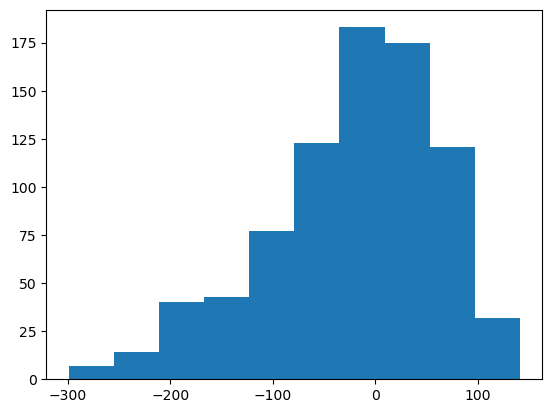

In [28]:
plt.hist(df["Profit"])
plt.show()

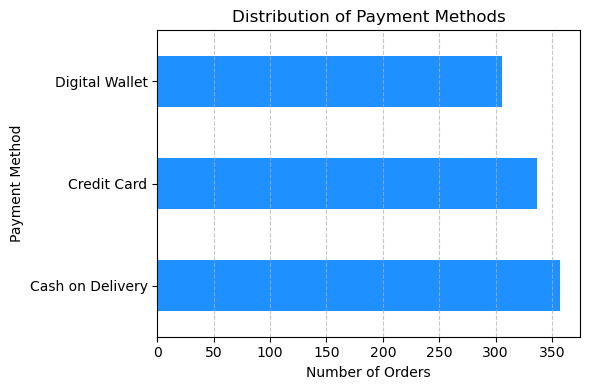

In [29]:

# Count the occurrences of each payment method
payment_methods = df['Payment Method'].value_counts()

# Plot the distribution of payment methods as a horizontal bar chart
plt.figure(figsize=(6, 4))
payment_methods.plot(kind='barh', color='dodgerblue')
plt.title('Distribution of Payment Methods')
plt.xlabel('Number of Orders')
plt.ylabel('Payment Method')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


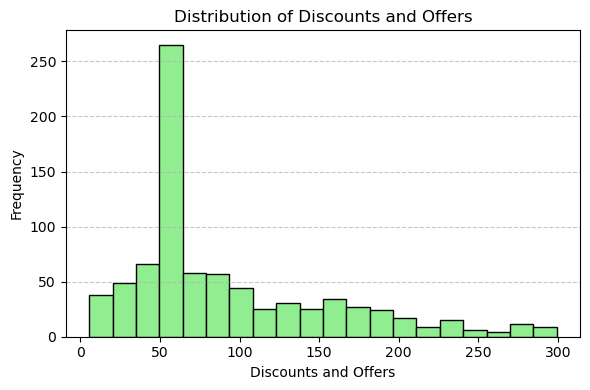

In [30]:
# Plot the distribution of discounts and offers using a histogram
plt.figure(figsize=(6, 4))
plt.hist(df['Discounts and Offers'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Discounts and Offers')
plt.xlabel('Discounts and Offers')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

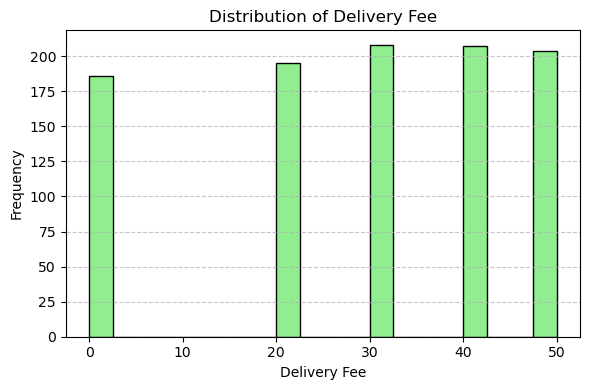

In [31]:
# Plot the distribution of the delivery fee using a histogram
plt.figure(figsize=(6, 4))
plt.hist(df['Delivery Fee'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Delivery Fee')
plt.xlabel('Delivery Fee')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


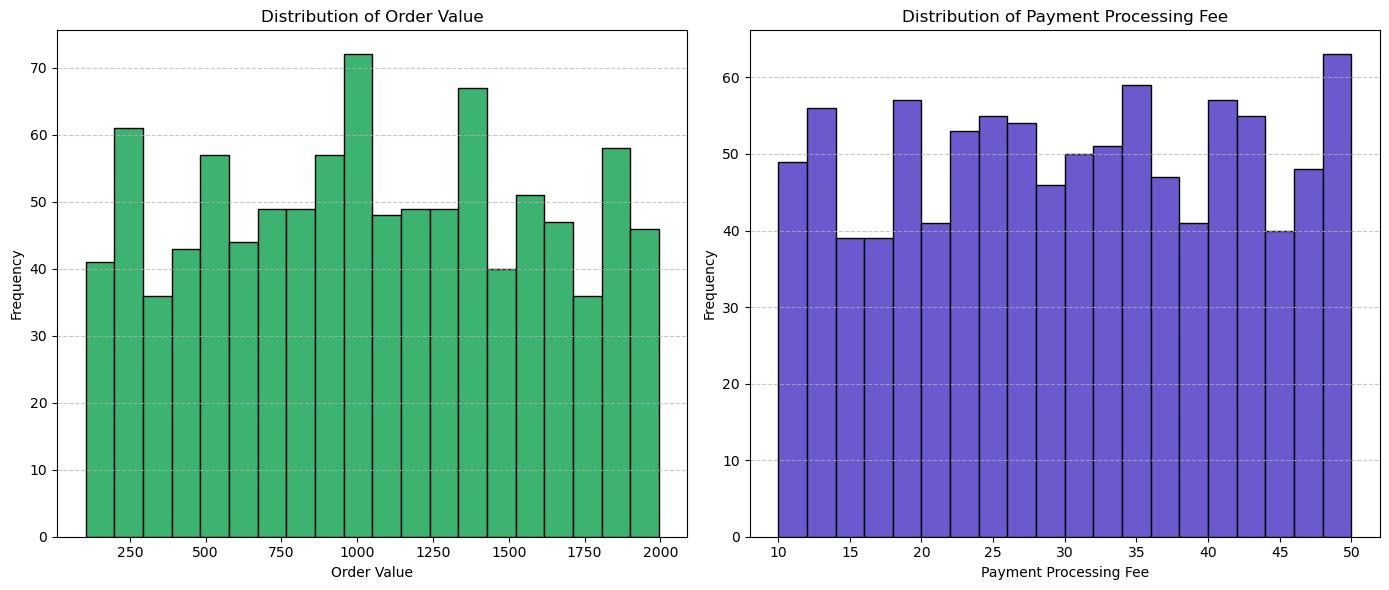

In [32]:
# Plot the distribution of order value using a histogram
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # First subplot for Order Value
plt.hist(df['Order Value'], bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)  # Second subplot for Payment Processing Fee
plt.hist(df['Payment Processing Fee'], bins=20, color='slateblue', edgecolor='black')
plt.title('Distribution of Payment Processing Fee')
plt.xlabel('Payment Processing Fee')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Show the plots
plt.show()


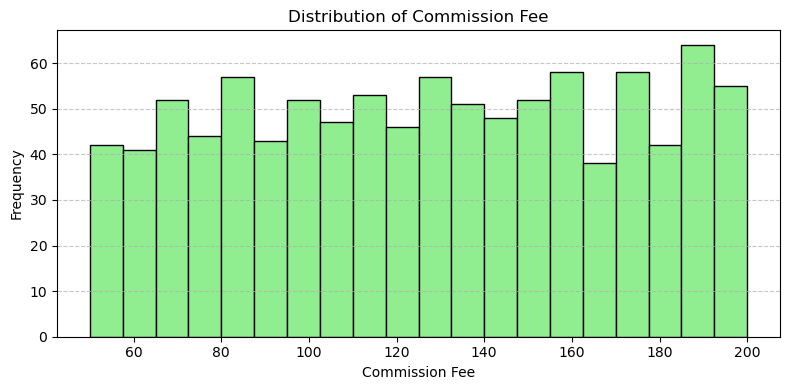

In [33]:
# Plot the distribution of commission fees using a histogram
plt.figure(figsize=(8, 4))
plt.hist(df['Commission Fee'], bins=20, color='lightgreen',edgecolor='black')
plt.title('Distribution of Commission Fee')
plt.xlabel('Commission Fee')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
output_file_path = r"C:\Users\PMLS\OneDrive\Desktop\MAKE IT\PYTHON FOR DATA ANALYSIS\1st python project\New folder\output_file.csv"
df.to_csv(output_file_path, index=False)
print(f"File saved as {output_file_path}")


File saved as C:\Users\PMLS\OneDrive\Desktop\MAKE IT\PYTHON FOR DATA ANALYSIS\1st python project\New folder\output_file.csv


In [35]:
import pandas as pd

# Group by 'Order Month' and sum the 'Discounts and Offers' column
monthly_data = df.groupby('Order Month')['Discounts and Offers'].sum().reset_index()
monthly_data.columns = ['Order Month', 'Total Discounts and Offers']

# Sort by total amount to find which month had the most
monthly_data_sorted = monthly_data.sort_values(by='Total Discounts and Offers', ascending=False)
print(monthly_data_sorted)


  Order Month  Total Discounts and Offers
1     January                    60252.20
0    February                    14037.65


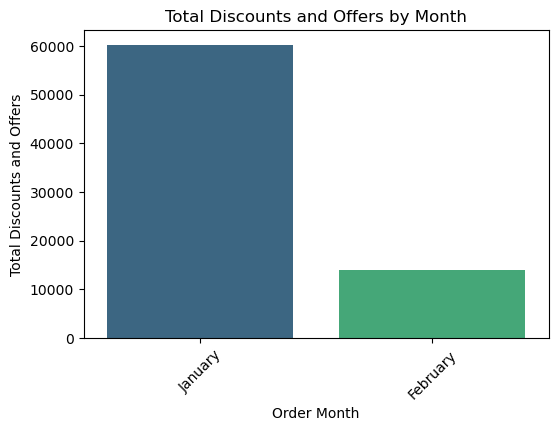

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=monthly_data_sorted, x='Order Month', y='Total Discounts and Offers', palette='viridis')
plt.title('Total Discounts and Offers by Month')
plt.xlabel('Order Month')
plt.ylabel('Total Discounts and Offers')
plt.xticks(rotation=45)
plt.show()


In [37]:
import pandas as pd

# Calculate Profit if not already present
df['Profit'] = df['Order Value'] - (df['Delivery Fee'] + df['Commission Fee'] + df['Payment Processing Fee'])

# Aggregate Profit by 'Order Month'
monthly_profit = df.groupby('Order Month')['Profit'].sum().reset_index()
monthly_profit.columns = ['Order Month', 'Total Profit']

# Sort by month if needed
monthly_profit_sorted = monthly_profit.sort_values(by='Order Month')
print(monthly_profit_sorted)


  Order Month  Total Profit
0    February        171539
1     January        696988


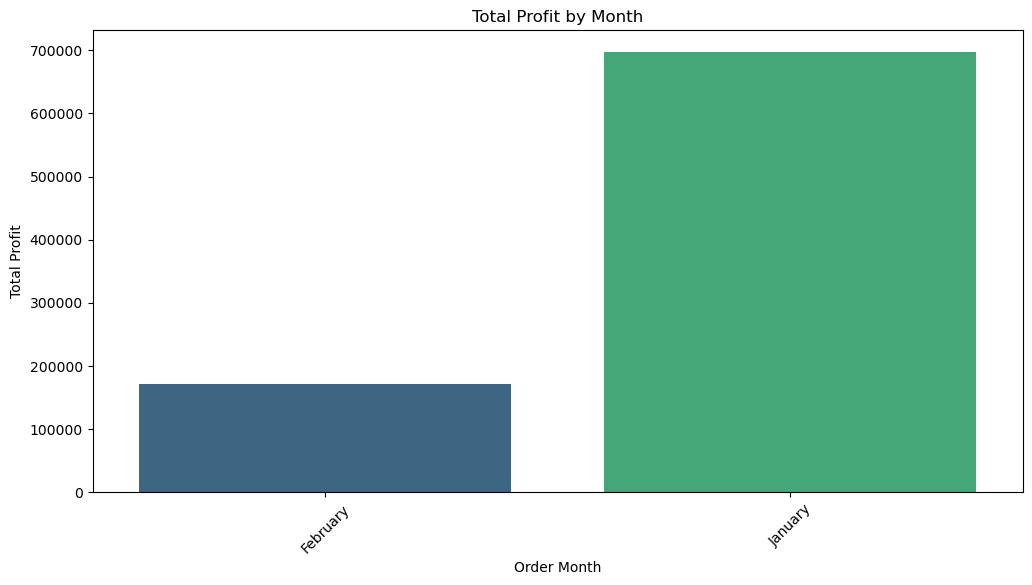

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_profit_sorted, x='Order Month', y='Total Profit', palette='viridis')
plt.title('Total Profit by Month')
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


In [42]:
import pandas as pd

# Calculate Total Cost
df['Total Cost'] = df['Delivery Fee'] + df['Commission Fee'] + df['Payment Processing Fee']

# Aggregate Total Cost by 'Order Month'
monthly_cost = df.groupby('Order Month')['Total Cost'].sum().reset_index()
monthly_cost.columns = ['Order Month', 'Total Cost']

# Sort by month if needed
monthly_cost_sorted = monthly_cost.sort_values(by='Order Month')
print(monthly_cost_sorted)


  Order Month  Total Cost
0    February       35752
1     January      149690


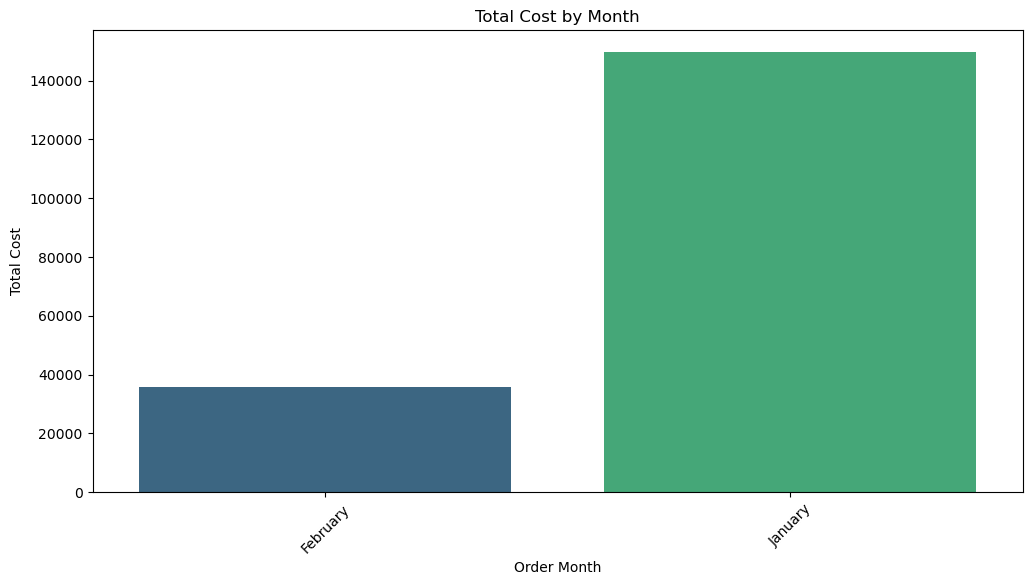

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_cost_sorted, x='Order Month', y='Total Cost', palette='viridis')
plt.title('Total Cost by Month')
plt.xlabel('Order Month')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.show()
